# VEST MI 2020 - US President and US Senate

In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt

## VEST Documentation

### Sources:

Election results from the Michigan Secretary of State (https://miboecfr.nictusa.com/cgi-bin/cfr/precinct_srch.cgi)  
Precinct shapefile from the Michigan GIS Open Data site (https://gis-michigan.opendata.arcgis.com/datasets/49eb37d0a4294924bf8ef5ffe0eac47e_6/)  

### Notes:

Some counties report "Statistical Adjustments" with their precinct results, which can either be positive or negative. Many of these are related to cities that span county lines, as they often match precinct results of these county-spanning cities. In some cases these adjustments cancel each other out across the two counties that share the city, but some (notably Clinton County's East Lansing and Eaton County's Lansing adjustments) are not reciprocated, which introduces error to statewide totals. Other than these, there appears to be a handful of tiny adjustments that were made to make the precinct totals match official countywide totals. None of these adjustments of any type were distributed to precincts, which may result in candidate totals being slightly off official totals.

Write-in vote totals have been excluded, since in most cases, a large share of their votes are accounted for via statistical adjustments.

### Processing

In several cases, cities that overlapped county lines reported results in each county, but the shapefile had a single precinct. These were split at the county line in the shapefile and the two sets of results assigned accordingly.
Claire city - Isabella/Clare
Brown city - Lapeer/Sanilac
Fenton city - Oakland/Genesee
Richmond city - St. Clair/Macomb

Berrien: the results for Sodus and St. Joseph townships appear to have been flipped, these were corrected
Ottawa: via contact with the Park Township clerk's office, precinct 9 in the state shapefile has been renumbered to precinct 4  
Wayne: Detroit reports absentee votes via Absent Voter Counting Boards. The linkage file of boards to precincts is from OpenElections (https://github.com/openelections/openelections-sources-mi/tree/master/2020), and votes were distributed to precincts proportionally by election day vote.

### Races

G20PRERTRU - Donald J. Trump (Republican Party)  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Party)  
G20PRENDEL - Rocky De La Fuente (Natural Law Party)  
G20PRETBLA - Don Blankenship (US Taxpayers Party)  

G20USSRJAM - John James (Republican Party)  
G20USSDPET - Gary Peters (Democratic Party)  
G20USSGSQU - Marcia Squier (Green Party)  
G20USSNDER - Doug Dern (Natural Law Party)  
G20USSTWIL - Valerie L. Willis (US Taxpayers Party)  

## Load VEST File

In [2]:
vest_mi_20 = gp.read_file('./raw_from_source/VEST/mi_2020/mi_2020.shp')

#Take a look
vest_mi_20.head()

,PRECINCTID,COUNTYFIPS,cousubname,elexpre,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRENDEL,G20PRETBLA,G20USSRJAM,G20USSDPET,G20USSGSQU,G20USSNDER,G20USSTWIL,geometry
0,WP-001-01040-00001,001,Alcona township,001-ALCONA TOWNSHIP-0-0001,564,248,3,2,0,2,539,267,4,2,3,"POLYGON ((-83.29467 44.77346, -83.29577 44.773..."
1,WP-001-12460-00001,001,Caledonia township,001-CALEDONIA TOWNSHIP-0-0001,508,245,4,0,0,0,485,261,1,0,4,"POLYGON ((-83.64206 44.81382, -83.64578 44.813..."
2,WP-001-19320-00001,001,Curtis township,001-CURTIS TOWNSHIP-0-0001,486,238,2,1,0,1,456,240,5,4,10,"POLYGON ((-83.64530 44.51091, -83.64918 44.510..."
3,WP-001-34820-00001,001,Greenbush township,001-GREENBUSH TOWNSHIP-0-0001,560,302,9,1,0,1,531,322,4,5,6,"POLYGON ((-83.31858 44.51165, -83.32054 44.511..."
4,WP-001-35740-00001,001,Gustin township,001-GUSTIN TOWNSHIP-0-0001,317,112,9,0,0,0,306,122,1,0,6,"POLYGON ((-83.40227 44.59806, -83.41508 44.598..."


## Election Results

In [3]:
vest_mi_20.columns

Index(['PRECINCTID', 'COUNTYFIPS', 'cousubname', 'elexpre', 'G20PRERTRU',
       'G20PREDBID', 'G20PRELJOR', 'G20PREGHAW', 'G20PRENDEL', 'G20PRETBLA',
       'G20USSRJAM', 'G20USSDPET', 'G20USSGSQU', 'G20USSNDER', 'G20USSTWIL',
       'geometry'],
      dtype='object')

### All candidates in election results file:

**2020:GEN:1:00000:0:-1417:WELLS:KASEY::NPA:  
**2020:GEN:1:00000:0:-1416:HOEFLING:TOM::NPA:  
**2020:GEN:1:00000:0:-1415:HUNTER:TARA RENEE::NPA:  
**2020:GEN:1:00000:0:-1414:CARROLL:BRIAN:T.:NPA:  
**2020:GEN:1:00000:0:-1413:SIMMONS:JADE::NPA:**  
2020:GEN:1:00000:0:-1403:TRUMP:DONALD:J.:REP:  
2020:GEN:1:00000:0:-1401:BIDEN:JOSEPH:R.:DEM:  
2020:GEN:1:00000:0:-1398:DE LA FUENTE:ROCKY::NLP:  
2020:GEN:1:00000:0:-1391:BLANKENSHIP:DON::UST:  
2020:GEN:1:00000:0:-1385:JORGENSEN:JO::LIB:  
2020:GEN:1:00000:0:-1373:HAWKINS:HOWIE::GRN:  
**2020:GEN:5:00000:0:-1419:GADZINSKI:LEONARD:PAUL:NPA:  
**2020:GEN:5:00000:0:-1400:CARR:ROBERT:WILLIAM:NPA:**  
2020:GEN:5:00000:0:-1397:DERN:DOUG::NLP:  
2020:GEN:5:00000:0:-1393:WILLIS:VALERIE:L.:UST:  
2020:GEN:5:00000:0:-1365:SQUIER:MARCIA::GRN:  
2020:GEN:5:00000:0:-1304:PETERS:GARY::DEM:  
2020:GEN:5:00000:0:-1283:JAMES:JOHN::REP:  

In [4]:
## Load + Process format
df = pd.read_csv('./raw_from_source/Election_Results/2020GEN/2020vote.txt', delimiter = '\t', header = None)

#columns defined in documentation
df.columns = ['election_year','election_type','office_code','district_code',
            'status_code','candidate_id','county_code','city_town_code','ward_number',
            'precinct_number','precinct_label','precinct_votes','na_col']

#Filter to office code `1` for president and '5' for senate
df = df[(df['office_code'] == 1)|(df['office_code'] == 5)]

#Filter out candidates we don't need
df = df[~df["candidate_id"].isin([-1417,-1416,-1415,-1414,-1413,-1419,-1400])]

In [5]:
#Have to replace NaNs in `precinct_label` with empty strings so that we can use it as an index in the pivot
df['precinct_label'] = df['precinct_label'].replace(np.nan, '', regex = True)

#Confirm that this worked
df["precinct_label"].unique()

array(['', 'N', 'S', 'W', 'AVCB', 'A', 'B', 'C'], dtype=object)

In [6]:
## PIVOT RESULTS
df_pivot = df.pivot_table(index = ['county_code','city_town_code','ward_number','precinct_number','precinct_label'],
                         columns = ['candidate_id'],
                        values = ['precinct_votes'],
                         aggfunc = 'sum')

#Clean up the indices
df_pivot.reset_index(inplace = True,drop=False)

In [7]:
#Define a dictionary to rename the columns
candidate_id_dict = {(    'county_code',    ''):'county_code',( 'city_town_code',    ''):'city_town_code',
                     (    'ward_number',    ''):'ward_number',('precinct_number',    ''):'precinct_number',
                     ( 'precinct_label',    ''):'precinct_label',
                     ('precinct_votes', -1403):'G20PRERTRU', ('precinct_votes', -1401):'G20PREDBID',('precinct_votes', -1385):'G20PRELJOR', 
                    ('precinct_votes', -1373):'G20PREGHAW', ('precinct_votes', -1398):'G20PRENDEL',('precinct_votes', -1391):'G20PRETBLA', 
                    ('precinct_votes', -1283):'G20USSRJAM',('precinct_votes', -1304):'G20USSDPET',('precinct_votes', -1365):'G20USSGSQU', 
                    ('precinct_votes', -1397):'G20USSNDER',('precinct_votes', -1393):'G20USSTWIL'}

#Rename the columns
df_pivot.columns = df_pivot.columns.map(candidate_id_dict)

In [8]:
#Define a list of races
races = list(i for i in df_pivot.columns if "G20" in i)
races

['G20PRERTRU',
 'G20PREDBID',
 'G20PRENDEL',
 'G20USSNDER',
 'G20USSTWIL',
 'G20PRETBLA',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20USSGSQU',
 'G20USSDPET',
 'G20USSRJAM']

In [9]:
#Clean the vote columns
for race in races:
    df_pivot[race] = df_pivot[race].fillna(0)

## Statewide Total Check

In [10]:
#Function to check column/race totals
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [11]:
statewide_totals_check(vest_mi_20,df_pivot,races)

***Statewide Totals Check***
G20PRERTRU has a difference of 625.0 votes
	VEST: 2649859 votes
	SOURCES: 2649234.0 votes
G20PREDBID has a difference of 2567.0 votes
	VEST: 2804036 votes
	SOURCES: 2801469.0 votes
G20PRENDEL has a difference of 2.0 votes
	VEST: 2985 votes
	SOURCES: 2983.0 votes
G20USSNDER has a difference of 6.0 votes
	VEST: 13093 votes
	SOURCES: 13087.0 votes
G20USSTWIL has a difference of 30.0 votes
	VEST: 50596 votes
	SOURCES: 50566.0 votes
G20PRETBLA has a difference of -27.0 votes
	VEST: 7204 votes
	SOURCES: 7231.0 votes
G20PRELJOR has a difference of 50.0 votes
	VEST: 60406 votes
	SOURCES: 60356.0 votes
G20PREGHAW has a difference of 13.0 votes
	VEST: 13718 votes
	SOURCES: 13705.0 votes
G20USSGSQU has a difference of 37.0 votes
	VEST: 39217 votes
	SOURCES: 39180.0 votes
G20USSDPET has a difference of 2517.0 votes
	VEST: 2734558 votes
	SOURCES: 2732041.0 votes
G20USSRJAM has a difference of 609.0 votes
	VEST: 2642221 votes
	SOURCES: 2641612.0 votes


In [12]:
#Check when removing the statistical adjustments (these have precinct number 9999)
df_pivot_wo_adjustments = df_pivot[df_pivot["precinct_number"]!=9999]
statewide_totals_check(vest_mi_20,df_pivot_wo_adjustments,races)

***Statewide Totals Check***
G20PRERTRU is equal 	VEST / RDH: 2649859
G20PREDBID is equal 	VEST / RDH: 2804036
G20PRENDEL is equal 	VEST / RDH: 2985
G20USSNDER is equal 	VEST / RDH: 13093
G20USSTWIL is equal 	VEST / RDH: 50596
G20PRETBLA is equal 	VEST / RDH: 7204
G20PRELJOR is equal 	VEST / RDH: 60406
G20PREGHAW is equal 	VEST / RDH: 13718
G20USSGSQU is equal 	VEST / RDH: 39217
G20USSDPET is equal 	VEST / RDH: 2734558
G20USSRJAM is equal 	VEST / RDH: 2642221


## County Total Check

In [13]:
#### Add County Name
#The SOS results have county codes that are not FIPS codes. Pulled the `county.txt` file to a Sheet and lined it up with county fips codes from Wikipedia. Loading in this file created in Sheets. 
county_names = pd.read_csv('./raw_from_source/State_Info/county_codes.csv')

In [14]:
#Make the FIPS 3 digits long
county_names["county_fips"] = county_names["county_fips"].astype(str).str.zfill(3)

#Create a dictionary to go from county code to the county FIPS
cty_code_dict = dict(zip(county_names["county_code"],county_names["county_fips"].str.zfill(3)))

#Add in the county FIPS
df_pivot["COUNTYFIPS"] = df_pivot["county_code"].map(cty_code_dict).fillna("n/a")

In [15]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    print(diff_counties)

In [16]:
county_totals_check(vest_mi_20,df_pivot,races,"COUNTYFIPS",full_print=False)

***Countywide Totals Check***

G20PRERTRU contains differences in these counties:
	015 has a difference of -550.0 votes
		VEST: 22921 votes
		SOURCES: 23471.0 votes
	017 has a difference of 32.0 votes
		VEST: 33157 votes
		SOURCES: 33125.0 votes
	025 has a difference of -2.0 votes
		VEST: 36219 votes
		SOURCES: 36221.0 votes
	035 has a difference of 18.0 votes
		VEST: 10842 votes
		SOURCES: 10824.0 votes
	037 has a difference of 314.0 votes
		VEST: 25098 votes
		SOURCES: 24784.0 votes
	045 has a difference of 309.0 votes
		VEST: 31798 votes
		SOURCES: 31489.0 votes
	065 has a difference of -5.0 votes
		VEST: 47634 votes
		SOURCES: 47639.0 votes
	073 has a difference of -18.0 votes
		VEST: 14833 votes
		SOURCES: 14851.0 votes
	087 has a difference of -2.0 votes
		VEST: 35484 votes
		SOURCES: 35486.0 votes
	111 has a difference of -32.0 votes
		VEST: 27643 votes
		SOURCES: 27675.0 votes
	115 has a difference of 12.0 votes
		VEST: 52722 votes
		SOURCES: 52710.0 votes
	147 has a difference

In [17]:
#Try the comparison without the statistical adjustments
df_pivot_wo_adjustments = df_pivot[df_pivot["precinct_number"]!=9999]
county_totals_check(vest_mi_20,df_pivot_wo_adjustments,races,"COUNTYFIPS",full_print=False)

***Countywide Totals Check***

G20PRERTRU contains differences in these counties:
	015 has a difference of -550.0 votes
		VEST: 22921 votes
		SOURCES: 23471.0 votes
	153 has a difference of 550.0 votes
		VEST: 3640 votes
		SOURCES: 3090.0 votes
G20PREDBID contains differences in these counties:
	015 has a difference of -480.0 votes
		VEST: 11317 votes
		SOURCES: 11797.0 votes
	153 has a difference of 480.0 votes
		VEST: 2069 votes
		SOURCES: 1589.0 votes
G20PRENDEL contains differences in these counties:
	015 has a difference of -1.0 votes
		VEST: 15 votes
		SOURCES: 16.0 votes
	153 has a difference of 1.0 votes
		VEST: 5 votes
		SOURCES: 4.0 votes
G20USSNDER contains differences in these counties:
	015 has a difference of -3.0 votes
		VEST: 92 votes
		SOURCES: 95.0 votes
	153 has a difference of 3.0 votes
		VEST: 14 votes
		SOURCES: 11.0 votes
G20USSTWIL contains differences in these counties:
	015 has a difference of -18.0 votes
		VEST: 348 votes
		SOURCES: 366.0 votes
	153 has a dif

For this, it seems like VEST assigned a precinct slightly differently than how we did, 015-HASTINGS CITY-0-0001	550.

We'll check below whether this seems correct

In [18]:
print(df_pivot[df_pivot["COUNTYFIPS"]=="015"].sort_values(["G20PRERTRU"]).shape)
print(vest_mi_20[vest_mi_20["COUNTYFIPS"]=="015"].sort_values(["G20PRERTRU"]).shape)

print(df_pivot[df_pivot["COUNTYFIPS"]=="153"].sort_values(["G20PRERTRU"]).shape)
print(vest_mi_20[vest_mi_20["COUNTYFIPS"]=="153"].sort_values(["G20PRERTRU"]).shape)

(24, 17)
(23, 16)
(11, 17)
(12, 16)


## Precinct Totals Check

In [19]:
#### Add City/Township Name
#Loading in the `2016city.txt` file that has the corresponding names for the city codes in the election results file
city_codes = pd.read_csv('./raw_from_source/Election_Results/2020GEN/2020city.txt',delimiter='\t',header=None)
city_codes.columns = ['election_year','election_type','county_code','city_town_code','city_town_name','null']
city_codes.drop(['election_year','election_type','null'],axis=1,inplace=True)
df_pivot = df_pivot.merge(city_codes, on = ['county_code','city_town_code'])

In [20]:
print(df_pivot.head())

   county_code  city_town_code  ward_number  precinct_number precinct_label  \
0            1               2            0                1                  
1            1               4            0                1                  
2            1               6            0                1                  
3            1               8            0                1                  
4            1              10            0                1                  

   G20PRERTRU  G20PREDBID  G20PRENDEL  G20USSNDER  G20USSTWIL  G20PRETBLA  \
0       564.0       248.0         0.0         2.0         3.0         2.0   
1       508.0       245.0         0.0         0.0         4.0         0.0   
2       486.0       238.0         0.0         4.0        10.0         1.0   
3       560.0       302.0         0.0         5.0         6.0         1.0   
4       317.0       112.0         0.0         0.0         6.0         0.0   

   G20PRELJOR  G20PREGHAW  G20USSGSQU  G20USSDPET  G20USSRJAM 

## Looking for unique ids

In [21]:
#Add in census geocodes
census = pd.read_excel('./raw_from_source/State_Info/all-geocodes-v2020.xlsx',skiprows=[0,1,2,3])

In [22]:
census

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
0,10,0,0,0,0,0,United States
1,40,1,0,0,0,0,Alabama
2,50,1,1,0,0,0,Autauga County
3,50,1,3,0,0,0,Baldwin County
4,50,1,5,0,0,0,Barbour County
...,...,...,...,...,...,...,...
43833,50,72,145,0,0,0,Vega Baja Municipio
43834,50,72,147,0,0,0,Vieques Municipio
43835,50,72,149,0,0,0,Villalba Municipio
43836,50,72,151,0,0,0,Yabucoa Municipio


In [23]:
#Filter down to Michigan
censusmi = census[census['State Code (FIPS)'] == 26]

#Make the names uppercase
censusmi.loc[:,'Area Name (including legal/statistical area description)']=censusmi.loc[:,'Area Name (including legal/statistical area description)'].str.upper()

#Create a new column
censusmi["city_town_name"] = censusmi['Area Name (including legal/statistical area description)']

#Cast the FIPS column to a string
censusmi["County Code (FIPS)"] = censusmi["County Code (FIPS)"].astype(str)

#Create a join_id
censusmi["join_id"] = censusmi["County Code (FIPS)"].str.zfill(3)+"-"+censusmi["city_town_name"]

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-23-80b106870c87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censusmi["city_town_name"] = censusmi['Area Name (including legal/statistical area description)']
<ipython-input-23-80b106870c87>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [24]:
#Create a join ID in the election results
df_pivot["join_id"] = df_pivot["COUNTYFIPS"] +"-"+df_pivot["city_town_name"] 

#Note: This does not need to be unique, as there will be repreat GEOCODES in the election results
df_pivot["join_id"].value_counts()

163-DETROIT CITY           637
081-GRAND RAPIDS CITY       76
049-FLINT CITY              61
161-ANN ARBOR CITY          53
099-WARREN CITY             49
                          ... 
165-COLFAX TOWNSHIP          1
035-FREEMAN TOWNSHIP         1
113-BLOOMFIELD TOWNSHIP      1
045-HAMLIN TOWNSHIP          1
107-HINTON TOWNSHIP          1
Name: join_id, Length: 1568, dtype: int64

In [25]:
#These should be unique
censusmi["join_id"].value_counts()

133-REED CITY CITY              1
063-WINSOR TOWNSHIP             1
000-ROCHESTER CITY              1
091-MADISON CHARTER TOWNSHIP    1
000-ST. CHARLES VILLAGE         1
                               ..
079-OLIVER TOWNSHIP             1
063-SHERIDAN TOWNSHIP           1
155-BENNINGTON TOWNSHIP         1
000-WYOMING CITY                1
015-ASSYRIA TOWNSHIP            1
Name: join_id, Length: 2157, dtype: int64

In [26]:
#Filter out the statistical adjustments, VEST says in their documentation that they don't allocate these
stat_adjustments = df_pivot[df_pivot["precinct_number"]==9999]
non_stat_adjustments = df_pivot[df_pivot["precinct_number"]!=9999]

In [27]:
election_results_final = pd.merge(non_stat_adjustments,censusmi,how="left",on="join_id",indicator=True,validate='m:1')
election_results_final["_merge"].value_counts()                            

both          3996
left_only      893
right_only       0
Name: _merge, dtype: int64

In [28]:
unjoined = list(election_results_final[election_results_final["_merge"]=="left_only"]["join_id"].unique())

In [29]:
non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].apply(lambda x: str(x).replace("TOWNSHIP","CHARTER TOWNSHIP") if x in unjoined else x)
#non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].apply(lambda x: str(x).replace("CITY","CITY CITY") if x in unjoined else x)






<ipython-input-29-a2358379a837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].apply(lambda x: str(x).replace("TOWNSHIP","CHARTER TOWNSHIP") if x in unjoined else x)


In [30]:
election_results_final = pd.merge(non_stat_adjustments,censusmi,how="left",on="join_id",indicator=True,validate='m:1')

In [31]:
election_results_final["_merge"].value_counts()

both          4830
left_only       59
right_only       0
Name: _merge, dtype: int64

In [32]:
unjoined = list(election_results_final[election_results_final["_merge"]=="left_only"]["join_id"].unique())

In [33]:
non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].apply(lambda x: str(x).replace("CITY","CITY CITY") if x in unjoined else x)

<ipython-input-33-158e5ade9d13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].apply(lambda x: str(x).replace("CITY","CITY CITY") if x in unjoined else x)


In [34]:
election_results_final = pd.merge(non_stat_adjustments,censusmi,how="left",on="join_id",indicator=True,validate='m:1')
election_results_final["_merge"].value_counts()

both          4869
left_only       20
right_only       0
Name: _merge, dtype: int64

In [35]:
unjoined = list(election_results_final[election_results_final["_merge"]=="left_only"]["join_id"].unique())

In [36]:
unjoined

['005-GUNPLAIN CHARTER TOWNSHIP',
 '013-LANSE CHARTER TOWNSHIP',
 '027-LA GRANGE CHARTER TOWNSHIP',
 '029-ST JAMES CHARTER TOWNSHIP',
 '037-DE WITT CHARTER TOWNSHIP',
 '037-DE WITT CITY CITY',
 '047-PLEASANT VIEW CHARTER TOWNSHIP',
 '079-COLD SPRINGS CHARTER TOWNSHIP',
 '099-GROSS POINTE SHORES CITY CITY',
 '125-CLARKSTON CITY CITY',
 '163-GROSSE POINTE SHORES CITY CITY']

In [37]:
id_changes_dict = {'005-GUNPLAIN CHARTER TOWNSHIP':'005-GUN PLAIN TOWNSHIP',
 '013-LANSE CHARTER TOWNSHIP':"013-L'ANSE TOWNSHIP",
 '027-LA GRANGE CHARTER TOWNSHIP':'027-LAGRANGE TOWNSHIP',
 '029-ST JAMES CHARTER TOWNSHIP':"029-ST. JAMES TOWNSHIP",
 '037-DE WITT CHARTER TOWNSHIP':"037-DEWITT CHARTER TOWNSHIP",
 '037-DE WITT CITY CITY':"037-DEWITT CITY",
 '047-PLEASANT VIEW CHARTER TOWNSHIP':"047-PLEASANTVIEW TOWNSHIP",
 '079-COLD SPRINGS CHARTER TOWNSHIP':"079-COLDSPRINGS TOWNSHIP",
 '099-GROSS POINTE SHORES CITY CITY':'099-VILLAGE OF GROSSE POINTE SHORES CITY',
 '125-CLARKSTON CITY CITY':'125-VILLAGE OF CLARKSTON CITY',
 '163-GROSSE POINTE SHORES CITY CITY':'163-VILLAGE OF GROSSE POINTE SHORES CITY'
}

In [38]:
non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].map(id_changes_dict).fillna(non_stat_adjustments["join_id"])

<ipython-input-38-97f01aced782>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].map(id_changes_dict).fillna(non_stat_adjustments["join_id"])


In [39]:
election_results_final = pd.merge(non_stat_adjustments,censusmi,how="left",on="join_id",indicator=True,validate='m:1')
election_results_final["_merge"].value_counts()

both          4889
left_only        0
right_only       0
Name: _merge, dtype: int64

In [40]:
election_results_final.drop(["_merge"],axis=1,inplace=True)

### Distribute AVCB votes

In [41]:
#Split up the votes into different categories
detroit_avcbs = election_results_final[election_results_final["precinct_label"]=="AVCB"]
precinct_votes = election_results_final[election_results_final["precinct_label"]!="AVCB"]
detroit_precincts = precinct_votes[precinct_votes["County Subdivision Code (FIPS)"]==22000]
other_votes = precinct_votes[precinct_votes["County Subdivision Code (FIPS)"]!=22000]

#Print out the shapes to make sure everything is adding up
print(election_results_final.shape)
print(detroit_avcbs.shape)
print(detroit_precincts.shape)
print(other_votes.shape)

(4889, 27)
(134, 27)
(503, 27)
(4252, 27)


In [42]:
#Load in the file that maps from precinct to AVCB
avcb_helper = pd.read_excel("./raw_from_source/State_Info/Detroit AVCBs by precinct (Nov. 2020).xlsx")

#Create a dictionary
avcb_helper_dict = dict(zip(avcb_helper["E-Day Precinct"],avcb_helper["ACVB Precinct"]))

#Add a AC
detroit_precincts["avcb Precinct"] = detroit_precincts["precinct_number"].map(avcb_helper_dict).fillna("n/a")

detroit_avcbs["avcb Precinct"] = detroit_avcbs["precinct_number"]

<ipython-input-42-c35d179bb43e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detroit_precincts["avcb Precinct"] = detroit_precincts["precinct_number"].map(avcb_helper_dict).fillna("n/a")
<ipython-input-42-c35d179bb43e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detroit_avcbs["avcb Precinct"] = detroit_avcbs["precinct_number"]


In [43]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [44]:
final_detroit = allocate_absentee(detroit_precincts,detroit_avcbs,races,"avcb Precinct")

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying

In [45]:
final_detroit.drop(["avcb Precinct"],axis=1,inplace=True)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
election_results_final = pd.concat([other_votes,final_detroit])

In [47]:
election_results_final.reset_index(inplace=True,drop=True)

### Create a unique ID and join

In [48]:
election_results_final["precinct_label"] = election_results_final["precinct_label"].astype(str)

In [49]:
election_results_final["precinct_number"] = election_results_final["precinct_number"].astype(str).str.zfill(3)
election_results_final["ward_number"] = election_results_final["ward_number"].astype(str).str.zfill(2)
election_results_final["County Subdivision Code (FIPS)"] = election_results_final["County Subdivision Code (FIPS)"].astype(str).str.zfill(5)

In [50]:
election_results_final["unique_ID"] = "WP"+"-"+election_results_final["COUNTYFIPS"]+"-"+election_results_final["County Subdivision Code (FIPS)"]+"-"+election_results_final["ward_number"]+election_results_final["precinct_number"]+election_results_final["precinct_label"]

In [51]:
vest_mi_20["unique_ID"] = vest_mi_20["PRECINCTID"]

In [52]:
precinct_join = pd.merge(vest_mi_20,election_results_final,how="outer",on="unique_ID",indicator="final",validate='1:1')
precinct_join["final"].value_counts()

# precinct_join[precinct_join["final"]=="left_only"].to_csv("./final_elections_join_vest.csv")
# precinct_join[precinct_join["final"]=="right_only"].to_csv("./final_elections_join_source.csv")

both          4738
left_only       18
right_only      17
Name: final, dtype: int64

In [53]:
final_join_dict = {'WP-021-74440-00002':'WP-021-70980-00002',
'WP-021-74440-00003':'WP-021-70980-00003',
'WP-021-74440-00004':'WP-021-70980-00004',
'WP-025-05920-04008':'WP-025-05920-05008',
'WP-051-32320-00001':'WP-051-32320-01001',
'WP-051-32320-00002':'WP-051-32320-01002',
'WP-115-55020-00003N':'WP-1155502000003N',
'WP-115-55020-00003S':'WP-1155502000003S',
'WP-129-69680-00001':'WP-129-69680-01001',
'WP-129-85580-00001':'WP-129-85580-01001',
'WP-161-53920-00001W':'WP-1615392000001W',
'WP-163-84940-01001':'WP-163-84940-00001',
'WP-163-84940-02002':'WP-163-84940-00002',
'WP-163-84940-03003':'WP-163-84940-00003',
'WP-163-84940-04004':'WP-163-84940-00004',
'WP-163-84940-05005':'WP-163-84940-00005',
'WP-163-84940-06006':'WP-163-84940-00006'}

In [54]:
#Apply the changes using the dictionary
election_results_final["unique_ID"] = election_results_final["unique_ID"].map(final_join_dict).fillna(election_results_final["unique_ID"])

In [55]:
#Join the precincts
precinct_join = pd.merge(vest_mi_20,election_results_final,how="outer",on="unique_ID",indicator="final",validate='1:1')
precinct_join["final"].value_counts()

both          4755
left_only        1
right_only       0
Name: final, dtype: int64

In [56]:
#Show the unjoined have 0 total votes
pd.options.display.max_columns = 50
display(precinct_join[precinct_join["final"]=="left_only"])

,PRECINCTID,COUNTYFIPS_x,cousubname,elexpre,G20PRERTRU_x,G20PREDBID_x,G20PRELJOR_x,G20PREGHAW_x,G20PRENDEL_x,G20PRETBLA_x,G20USSRJAM_x,G20USSDPET_x,G20USSGSQU_x,G20USSNDER_x,G20USSTWIL_x,geometry,unique_ID,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU_y,G20PREDBID_y,G20PRENDEL_y,G20USSNDER_y,G20USSTWIL_y,G20PRETBLA_y,G20PRELJOR_y,G20PREGHAW_y,G20USSGSQU_y,G20USSDPET_y,G20USSRJAM_y,COUNTYFIPS_y,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,final
673,WP-049-29000-05062,049,Flint city,None,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((-83.69876 43.01355, -83.70181 43.012...",WP-049-29000-05062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


## Precinct Check

In [57]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [58]:
precinct_votes_check(precinct_join[precinct_join["final"]=="both"],races,True,"unique_ID",print_level=0)

G20PRERTRU ......................................................WP-021-70980-00001 (V) ..730  (S)..719 (D):   11
G20PREDBID ......................................................WP-021-70980-00001 (V) .1201  (S)..389 (D):  812
G20USSNDER ......................................................WP-021-70980-00001 (V) ....4  (S)....2 (D):    2
G20USSTWIL ......................................................WP-021-70980-00001 (V) ...26  (S)....7 (D):   19
G20PRETBLA ......................................................WP-021-70980-00001 (V) ....5  (S)....1 (D):    4
G20PRELJOR ......................................................WP-021-70980-00001 (V) ...17  (S)...19 (D):   -2
G20USSGSQU ......................................................WP-021-70980-00001 (V) ....3  (S)....5 (D):   -2
G20USSDPET ......................................................WP-021-70980-00001 (V) .1130  (S)..363 (D):  767
G20USSRJAM ......................................................WP-021-70980-00001 (V) 

In [59]:
major_differences = ["WP-021-70980-00001","WP-021-74440-00001"]

In [60]:
vest_mi_20[vest_mi_20["unique_ID"].isin(major_differences)]


,PRECINCTID,COUNTYFIPS,cousubname,elexpre,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRENDEL,G20PRETBLA,G20USSRJAM,G20USSDPET,G20USSGSQU,G20USSNDER,G20USSTWIL,geometry,unique_ID
258,WP-021-70980-00001,021,St. Joseph charter township,021-SODUS TOWNSHIP-0-0001,730,1201,17,1,0,5,763,1130,3,4,26,"POLYGON ((-86.46785 42.10166, -86.46715 42.101...",WP-021-70980-00001
262,WP-021-74440-00001,021,Sodus township,021-ST. JOSEPH TOWNSHIP-0-0001,719,389,19,1,0,1,741,363,5,2,7,"POLYGON ((-86.43085 42.07255, -86.42947 42.072...",WP-021-74440-00001


In [61]:
election_results_final[election_results_final["unique_ID"].isin(major_differences)]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,unique_ID
243,11,36,00,001,,730.0,1201.0,0.0,4.0,26.0,5.0,17.0,1.0,3.0,1130.0,763.0,021,SODUS TOWNSHIP,021-SODUS TOWNSHIP,61,26,21,74440,0,0,SODUS TOWNSHIP,SODUS TOWNSHIP,WP-021-74440-00001
247,11,38,00,001,,719.0,389.0,0.0,2.0,7.0,1.0,19.0,1.0,5.0,363.0,741.0,021,ST. JOSEPH TOWNSHIP,021-ST. JOSEPH CHARTER TOWNSHIP,61,26,21,70980,0,0,ST. JOSEPH CHARTER TOWNSHIP,ST. JOSEPH CHARTER TOWNSHIP,WP-021-70980-00001


## Also check these

In [62]:
for val in final_join_dict:
    print(final_join_dict[val])

WP-021-70980-00002
WP-021-70980-00003
WP-021-70980-00004
WP-025-05920-05008
WP-051-32320-01001
WP-051-32320-01002
WP-1155502000003N
WP-1155502000003S
WP-129-69680-01001
WP-129-85580-01001
WP-1615392000001W
WP-163-84940-00001
WP-163-84940-00002
WP-163-84940-00003
WP-163-84940-00004
WP-163-84940-00005
WP-163-84940-00006


## Load in Shapefile

In [63]:
shp = gp.read_file('./raw_from_source/2020_Voting_Precincts/2020_Voting_Precincts.shp')

In [64]:
shp["unique_ID"] = shp["PRECINCTID"]

In [65]:
shp.shape

(4755, 18)

In [66]:
ser = shp["unique_ID"].value_counts()
ser[ser > 1]

WP-025-06720-00001    3
WP-049-27780-00004    2
Name: unique_ID, dtype: int64

<AxesSubplot:>

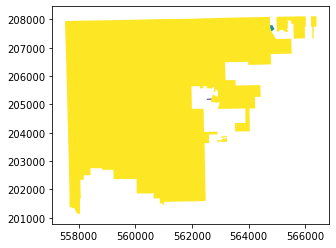

In [67]:
shp[shp["unique_ID"]=='WP-025-06720-00001'].plot(column="OBJECTID")

<AxesSubplot:>

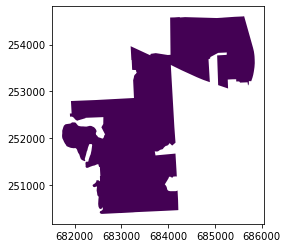

In [68]:
shp[shp["unique_ID"]=='WP-049-27780-00004'].plot(column="OBJECTID")

In [69]:
shp_clean = shp.dissolve("unique_ID")

In [70]:
shp_clean.shape
shp_clean.reset_index(inplace=True,drop=False)

## Shapefile Manipulations

In several cases, cities that overlapped county lines reported results in each county, but the shapefile had a single precinct. These were split at the county line in the shapefile and the two sets of results assigned accordingly.  

Claire city - Isabella/Clare  
Brown city - Lapeer/Sanilac  
Fenton city - Oakland/Genesee  
Richmond city - St. Clair/Macomb  

In [71]:
shp_counties = gp.read_file("./raw_from_source/State_Info/county_shapes/Counties_(v17a)/Counties_(v17a).shp")

In [72]:
shp_counties = shp_counties[["FIPSCODE","geometry"]]
print(type(shp_counties))

<class 'geopandas.geodataframe.GeoDataFrame'>


### 1) - Claire city - Isabella/Clare 

FIPS: 073, 035

In [73]:
election_results_final[election_results_final["city_town_name_x"].isin(["CLARE CITY"])]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,unique_ID
447,18,52,00,001,,808.0,623.0,0.0,4.0,10.0,0.0,17.0,9.0,10.0,607.0,814.0,035,CLARE CITY,035-CLARE CITY,61,26,35,15920,0,0,CLARE CITY,CLARE CITY,WP-035-15920-00001
1190,37,50,00,001,,18.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8.0,19.0,073,CLARE CITY,073-CLARE CITY,61,26,73,15920,0,0,CLARE CITY,CLARE CITY,WP-073-15920-00001


In [74]:
shp_clean[shp_clean["MCDFIPS"]=="15920"]

,unique_ID,geometry,PRECINCTID,ELECTIONYE,COUNTYFIPS,MCDFIPS,WARD,PRECINCT,OBJECTID_1,OBJECTID,NAME,STATEFP,VTDST,FUNCSTAT,VTDI,LSAD,ShapeSTAre,ShapeSTLen
431,WP-035-15920-00001,"MULTIPOLYGON (((601005.587 364607.501, 601005....",WP-035-15920-00001,2020,035,15920,00,001,422,424,0351592000001,26,035002,N,A,V1,9.442402e+06,37257.916393


<AxesSubplot:>

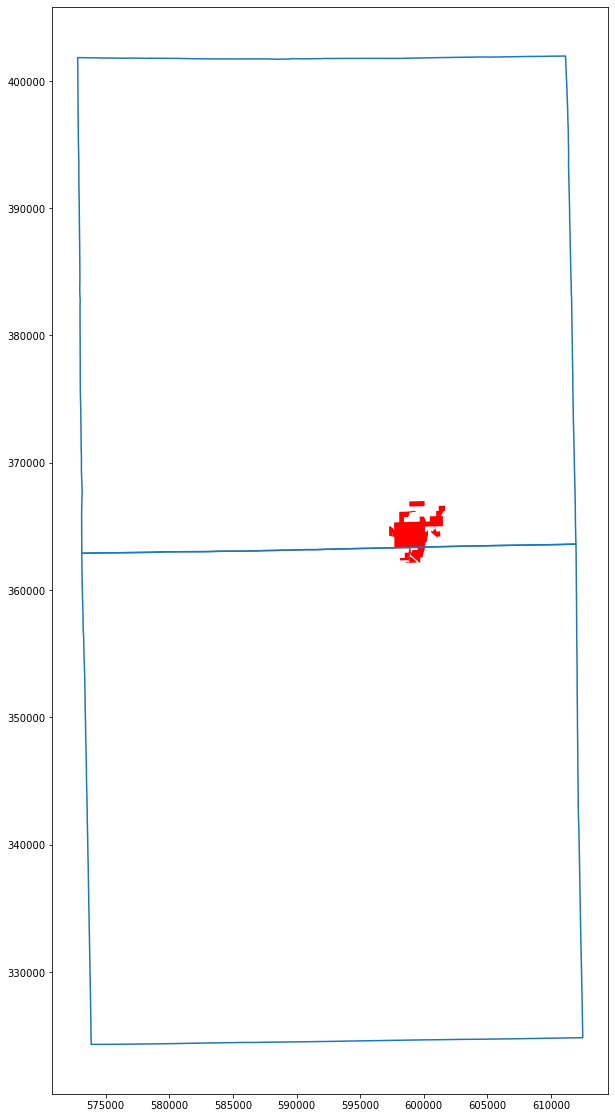

In [75]:
ax = shp_clean[shp_clean["MCDFIPS"]=="15920"].plot(color="red",figsize=(20,20))
shp_counties[shp_counties["FIPSCODE"].isin(["073", "035"])].boundary.plot(ax=ax)

In [76]:
#Locate the clare city shapefile and its index
clare_city = shp_clean[shp_clean["MCDFIPS"]=="15920"]

#Calculate the intersection

isabella = shp_counties[shp_counties["FIPSCODE"].isin(["073"])]
clare = shp_counties[shp_counties["FIPSCODE"].isin(["035"])]

clare_city_isabella = gp.overlay(isabella,clare_city, how='intersection',keep_geom_type=False)
clare_city_clare = gp.overlay(clare,clare_city, how='intersection',keep_geom_type=False)

<AxesSubplot:>

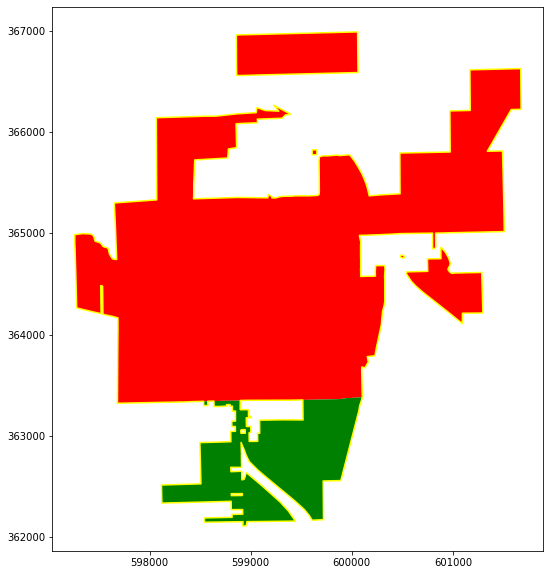

In [77]:
ax = clare_city.boundary.plot(figsize=(10,10),color="yellow")
clare_city_clare.plot(ax=ax,color="red")
clare_city_isabella.plot(ax=ax,color="green")

In [78]:
#Filter down columns
clare_city_isabella = clare_city_isabella[clare_city.columns]
clare_city_clare = clare_city_clare[clare_city.columns]

#Rename the "county_prec"
clare_city_isabella['unique_ID']="WP-073-15920-00001"
clare_city_clare['unique_ID']="WP-035-15920-00001"

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [79]:
election_results_final[election_results_final["city_town_name_x"].isin(["CLARE CITY"])]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,unique_ID
447,18,52,00,001,,808.0,623.0,0.0,4.0,10.0,0.0,17.0,9.0,10.0,607.0,814.0,035,CLARE CITY,035-CLARE CITY,61,26,35,15920,0,0,CLARE CITY,CLARE CITY,WP-035-15920-00001
1190,37,50,00,001,,18.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8.0,19.0,073,CLARE CITY,073-CLARE CITY,61,26,73,15920,0,0,CLARE CITY,CLARE CITY,WP-073-15920-00001


In [80]:
#Drop the old precinct
shp_clean = shp_clean[~(shp_clean["unique_ID"]=="WP-035-15920-00001")]

#Add the new files to the dataframe
shp_clean = shp_clean.append(clare_city_isabella)
shp_clean = shp_clean.append(clare_city_clare)
shp_clean.reset_index(drop=True, inplace=True)



### 2) - Brown city - Lapeer/Sanilac

FIPS: 087, 151

In [81]:
election_results_final[election_results_final["city_town_name_x"].isin(["BROWN CITY"])]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,unique_ID
1690,44,54,00,001,,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,087,BROWN CITY,087-BROWN CITY CITY,61,26,87,11180,0,0,BROWN CITY CITY,BROWN CITY CITY,WP-087-11180-00001
3497,76,52,00,001,,473.0,163.0,0.0,4.0,6.0,0.0,6.0,1.0,7.0,177.0,445.0,151,BROWN CITY,151-BROWN CITY CITY,61,26,151,11180,0,0,BROWN CITY CITY,BROWN CITY CITY,WP-151-11180-00001


In [82]:
shp_clean[shp_clean["MCDFIPS"]=="11180"]

,unique_ID,geometry,PRECINCTID,ELECTIONYE,COUNTYFIPS,MCDFIPS,WARD,PRECINCT,OBJECTID_1,OBJECTID,NAME,STATEFP,VTDST,FUNCSTAT,VTDI,LSAD,ShapeSTAre,ShapeSTLen
3469,WP-151-11180-00001,"MULTIPOLYGON (((745308.312 299449.936, 745301....",WP-151-11180-00001,2020,151,11180,00,001,3286,3295,1511118000001,26,151004,N,A,V1,2.921284e+06,11917.930645


<AxesSubplot:>

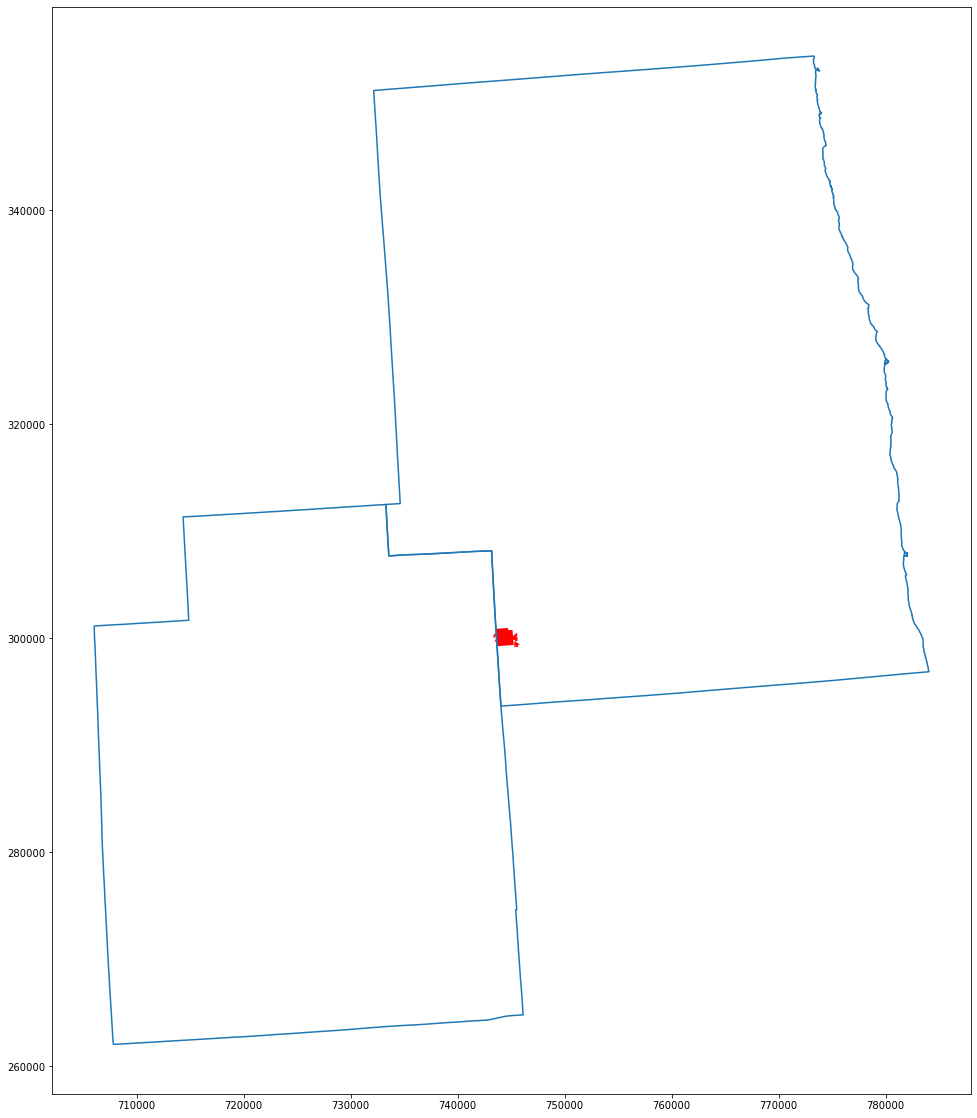

In [83]:
ax = shp_clean[shp_clean["MCDFIPS"]=="11180"].plot(color="red",figsize=(20,20))
shp_counties[shp_counties["FIPSCODE"].isin(["087", "151"])].boundary.plot(ax=ax)

In [84]:
#Locate the brown city shapefile and its index
brown_city = shp_clean[shp_clean["MCDFIPS"]=="11180"]

#Calculate the intersection

lapeer = shp_counties[shp_counties["FIPSCODE"].isin(["087"])]
sanilac = shp_counties[shp_counties["FIPSCODE"].isin(["151"])]

brown_city_lapeer = gp.overlay(lapeer,brown_city, how='intersection',keep_geom_type=False)
brown_city_sanilac = gp.overlay(sanilac,brown_city, how='intersection',keep_geom_type=False)

<AxesSubplot:>

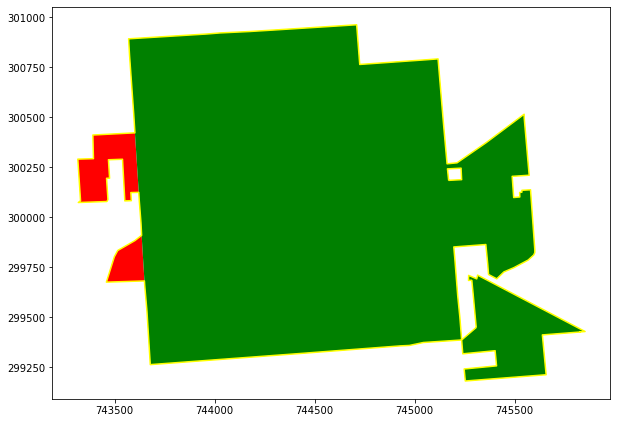

In [85]:
ax = brown_city.boundary.plot(figsize=(10,10),color="yellow")
brown_city_lapeer.plot(ax=ax,color="red")
brown_city_sanilac.plot(ax=ax,color="green")

In [86]:
#Filter down columns
brown_city_lapeer = brown_city_lapeer[brown_city.columns]
brown_city_sanilac = brown_city_sanilac[brown_city.columns]

#Rename the "county_prec"
brown_city_lapeer['unique_ID']="WP-087-11180-00001"
brown_city_sanilac['unique_ID']="WP-151-11180-00001"

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [87]:
election_results_final[election_results_final["city_town_name_x"].isin(["BROWN CITY"])]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,unique_ID
1690,44,54,00,001,,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,087,BROWN CITY,087-BROWN CITY CITY,61,26,87,11180,0,0,BROWN CITY CITY,BROWN CITY CITY,WP-087-11180-00001
3497,76,52,00,001,,473.0,163.0,0.0,4.0,6.0,0.0,6.0,1.0,7.0,177.0,445.0,151,BROWN CITY,151-BROWN CITY CITY,61,26,151,11180,0,0,BROWN CITY CITY,BROWN CITY CITY,WP-151-11180-00001


In [88]:
brown_city

,unique_ID,geometry,PRECINCTID,ELECTIONYE,COUNTYFIPS,MCDFIPS,WARD,PRECINCT,OBJECTID_1,OBJECTID,NAME,STATEFP,VTDST,FUNCSTAT,VTDI,LSAD,ShapeSTAre,ShapeSTLen
3469,WP-151-11180-00001,"MULTIPOLYGON (((745308.312 299449.936, 745301....",WP-151-11180-00001,2020,151,11180,00,001,3286,3295,1511118000001,26,151004,N,A,V1,2.921284e+06,11917.930645


In [89]:
#Drop the old precinct
shp_clean = shp_clean[~(shp_clean["unique_ID"]=="WP-151-11180-00001")]

#Add the new files to the dataframe
shp_clean = shp_clean.append(brown_city_lapeer)
shp_clean = shp_clean.append(brown_city_sanilac)
shp_clean.reset_index(drop=True, inplace=True)



### 3) - Fenton city - Oakland/Genesee 

FIPS: 125, 049

In [90]:
election_results_final[election_results_final["city_town_name_x"].isin(["FENTON CITY"])]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,unique_ID
736,25,56,00,001,,819.0,690.0,2.0,4.0,19.0,3.0,29.0,5.0,15.0,682.0,819.0,049,FENTON CITY,049-FENTON CITY,61,26,49,27760,0,0,FENTON CITY,FENTON CITY,WP-049-27760-00001
737,25,56,00,002,,786.0,649.0,0.0,4.0,4.0,1.0,15.0,3.0,9.0,633.0,779.0,049,FENTON CITY,049-FENTON CITY,61,26,49,27760,0,0,FENTON CITY,FENTON CITY,WP-049-27760-00002
738,25,56,00,003,,599.0,570.0,2.0,4.0,8.0,0.0,19.0,1.0,9.0,564.0,601.0,049,FENTON CITY,049-FENTON CITY,61,26,49,27760,0,0,FENTON CITY,FENTON CITY,WP-049-27760-00003
739,25,56,00,004,,767.0,666.0,0.0,4.0,8.0,1.0,25.0,8.0,14.0,659.0,753.0,049,FENTON CITY,049-FENTON CITY,61,26,49,27760,0,0,FENTON CITY,FENTON CITY,WP-049-27760-00004
740,25,56,00,005,,662.0,552.0,0.0,2.0,9.0,1.0,22.0,2.0,15.0,566.0,630.0,049,FENTON CITY,049-FENTON CITY,61,26,49,27760,0,0,FENTON CITY,FENTON CITY,WP-049-27760-00005
2844,63,61,00,002,,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,125,FENTON CITY,125-FENTON CITY,61,26,125,27760,0,0,FENTON CITY,FENTON CITY,WP-125-27760-00002


WP-049-27760-00001
WP-049-27760-00002
WP-049-27760-00003
WP-049-27760-00004
WP-049-27760-00005


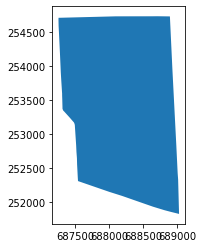

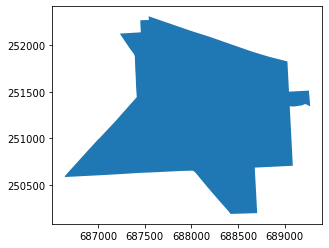

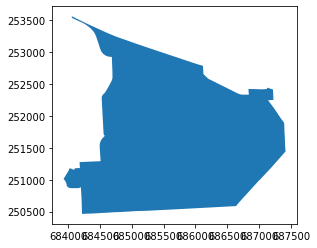

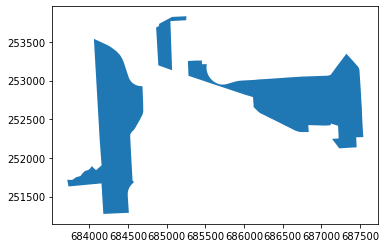

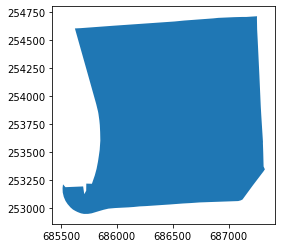

In [91]:
id_list = list(shp_clean[shp_clean["MCDFIPS"]=="27760"]["PRECINCTID"])

for val in id_list:
    print(val)
    shp_clean[shp_clean["PRECINCTID"]==val].plot()

<AxesSubplot:>

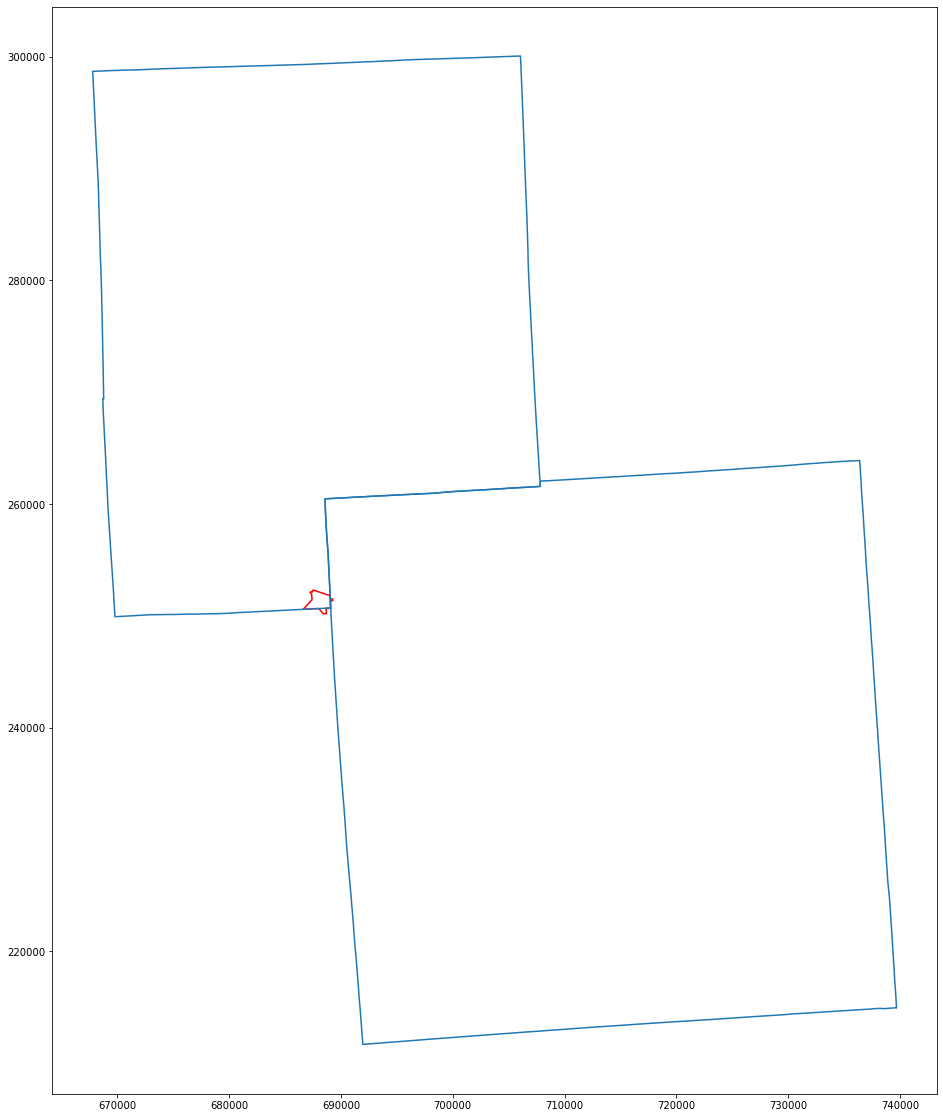

In [92]:
ax = shp_clean[shp_clean["PRECINCTID"]=="WP-049-27760-00002"].boundary.plot(color="red",figsize=(20,20))
shp_counties[shp_counties["FIPSCODE"].isin(["125", "049"])].boundary.plot(ax=ax)

In [93]:
#Locate the fenton city shapefile and its index
fenton_city = shp_clean[shp_clean["PRECINCTID"]=="WP-049-27760-00002"]

#Calculate the intersection

genesee = shp_counties[shp_counties["FIPSCODE"].isin(["049"])]
oakland = shp_counties[shp_counties["FIPSCODE"].isin(["125"])]

fenton_city_genesee = gp.overlay(genesee,fenton_city, how='intersection',keep_geom_type=False)
fenton_city_oakland = gp.overlay(oakland,fenton_city, how='intersection',keep_geom_type=False)

<AxesSubplot:>

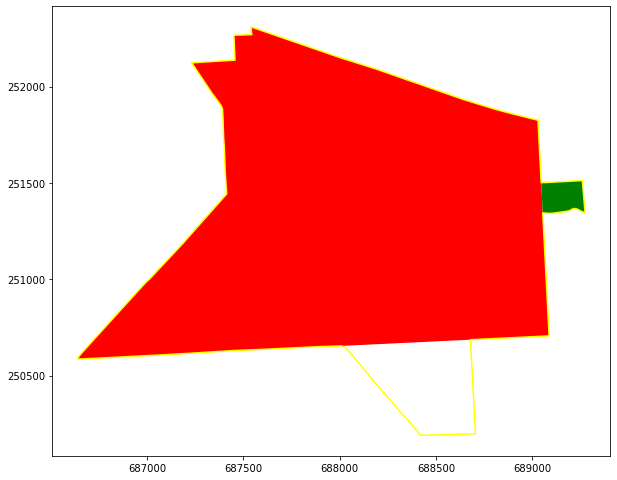

In [94]:
ax = fenton_city.boundary.plot(figsize=(10,10),color="yellow")
fenton_city_genesee.plot(ax=ax,color="red")
fenton_city_oakland.plot(ax=ax,color="green")

In [95]:
#Filter down columns
fenton_city_genesee = fenton_city_genesee[fenton_city.columns]
fenton_city_oakland = fenton_city_oakland[fenton_city.columns]

#Rename the "county_prec"
fenton_city_genesee['unique_ID']="WP-049-27760-00002"
fenton_city_oakland['unique_ID']="WP-125-27760-00002"

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [96]:
election_results_final[election_results_final["city_town_name_x"].isin(["FENTON CITY"])]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,unique_ID
736,25,56,00,001,,819.0,690.0,2.0,4.0,19.0,3.0,29.0,5.0,15.0,682.0,819.0,049,FENTON CITY,049-FENTON CITY,61,26,49,27760,0,0,FENTON CITY,FENTON CITY,WP-049-27760-00001
737,25,56,00,002,,786.0,649.0,0.0,4.0,4.0,1.0,15.0,3.0,9.0,633.0,779.0,049,FENTON CITY,049-FENTON CITY,61,26,49,27760,0,0,FENTON CITY,FENTON CITY,WP-049-27760-00002
738,25,56,00,003,,599.0,570.0,2.0,4.0,8.0,0.0,19.0,1.0,9.0,564.0,601.0,049,FENTON CITY,049-FENTON CITY,61,26,49,27760,0,0,FENTON CITY,FENTON CITY,WP-049-27760-00003
739,25,56,00,004,,767.0,666.0,0.0,4.0,8.0,1.0,25.0,8.0,14.0,659.0,753.0,049,FENTON CITY,049-FENTON CITY,61,26,49,27760,0,0,FENTON CITY,FENTON CITY,WP-049-27760-00004
740,25,56,00,005,,662.0,552.0,0.0,2.0,9.0,1.0,22.0,2.0,15.0,566.0,630.0,049,FENTON CITY,049-FENTON CITY,61,26,49,27760,0,0,FENTON CITY,FENTON CITY,WP-049-27760-00005
2844,63,61,00,002,,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,125,FENTON CITY,125-FENTON CITY,61,26,125,27760,0,0,FENTON CITY,FENTON CITY,WP-125-27760-00002


In [97]:
#Drop the old precinct
shp_clean = shp_clean[~(shp_clean["unique_ID"]=="WP-049-27760-00002")]

#Add the new files to the dataframe
shp_clean = shp_clean.append(fenton_city_genesee)
shp_clean = shp_clean.append(fenton_city_oakland)
shp_clean.reset_index(drop=True, inplace=True)



### 4) - Richmond city - St. Clair/Macomb

FIPS: 099, 147

In [98]:
election_results_final[election_results_final["city_town_name_x"].isin(["RICHMOND CITY"])]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,unique_ID
2051,50,64,00,001,,1199.0,605.0,2.0,8.0,21.0,1.0,15.0,2.0,7.0,625.0,1135.0,099,RICHMOND CITY,099-RICHMOND CITY,61,26,99,68380,0,0,RICHMOND CITY,RICHMOND CITY,WP-099-68380-00001
2052,50,64,00,002,,1092.0,494.0,0.0,5.0,14.0,3.0,12.0,2.0,13.0,524.0,1014.0,099,RICHMOND CITY,099-RICHMOND CITY,61,26,99,68380,0,0,RICHMOND CITY,RICHMOND CITY,WP-099-68380-00002
3442,74,63,00,001,,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,147,RICHMOND CITY,147-RICHMOND CITY,61,26,147,68380,0,0,RICHMOND CITY,RICHMOND CITY,WP-147-68380-00001


In [99]:
shp_clean[shp_clean["MCDFIPS"]=="68380"]

,unique_ID,geometry,PRECINCTID,ELECTIONYE,COUNTYFIPS,MCDFIPS,WARD,PRECINCT,OBJECTID_1,OBJECTID,NAME,STATEFP,VTDST,FUNCSTAT,VTDI,LSAD,ShapeSTAre,ShapeSTLen
2004,WP-099-68380-00001,"MULTIPOLYGON (((767298.327 256266.767, 767642....",WP-099-68380-00001,2020,099,68380,00,001,1924,1929,0996838000001,26,099163,N,A,V1,4.010434e+06,12558.877465
2005,WP-099-68380-00002,"POLYGON ((766879.123 255626.378, 766928.879 25...",WP-099-68380-00002,2020,099,68380,00,002,1925,1930,0996838000002,26,099164,N,A,V1,3.701698e+06,9318.317787


WP-099-68380-00001
WP-099-68380-00002


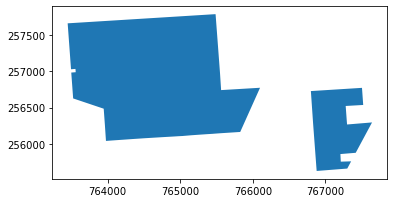

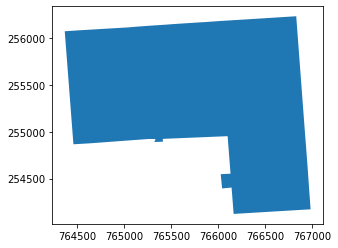

In [100]:
id_list = list(shp_clean[shp_clean["MCDFIPS"]=="68380"]["PRECINCTID"])

for val in id_list:
    print(val)
    shp_clean[shp_clean["PRECINCTID"]==val].plot()

<AxesSubplot:>

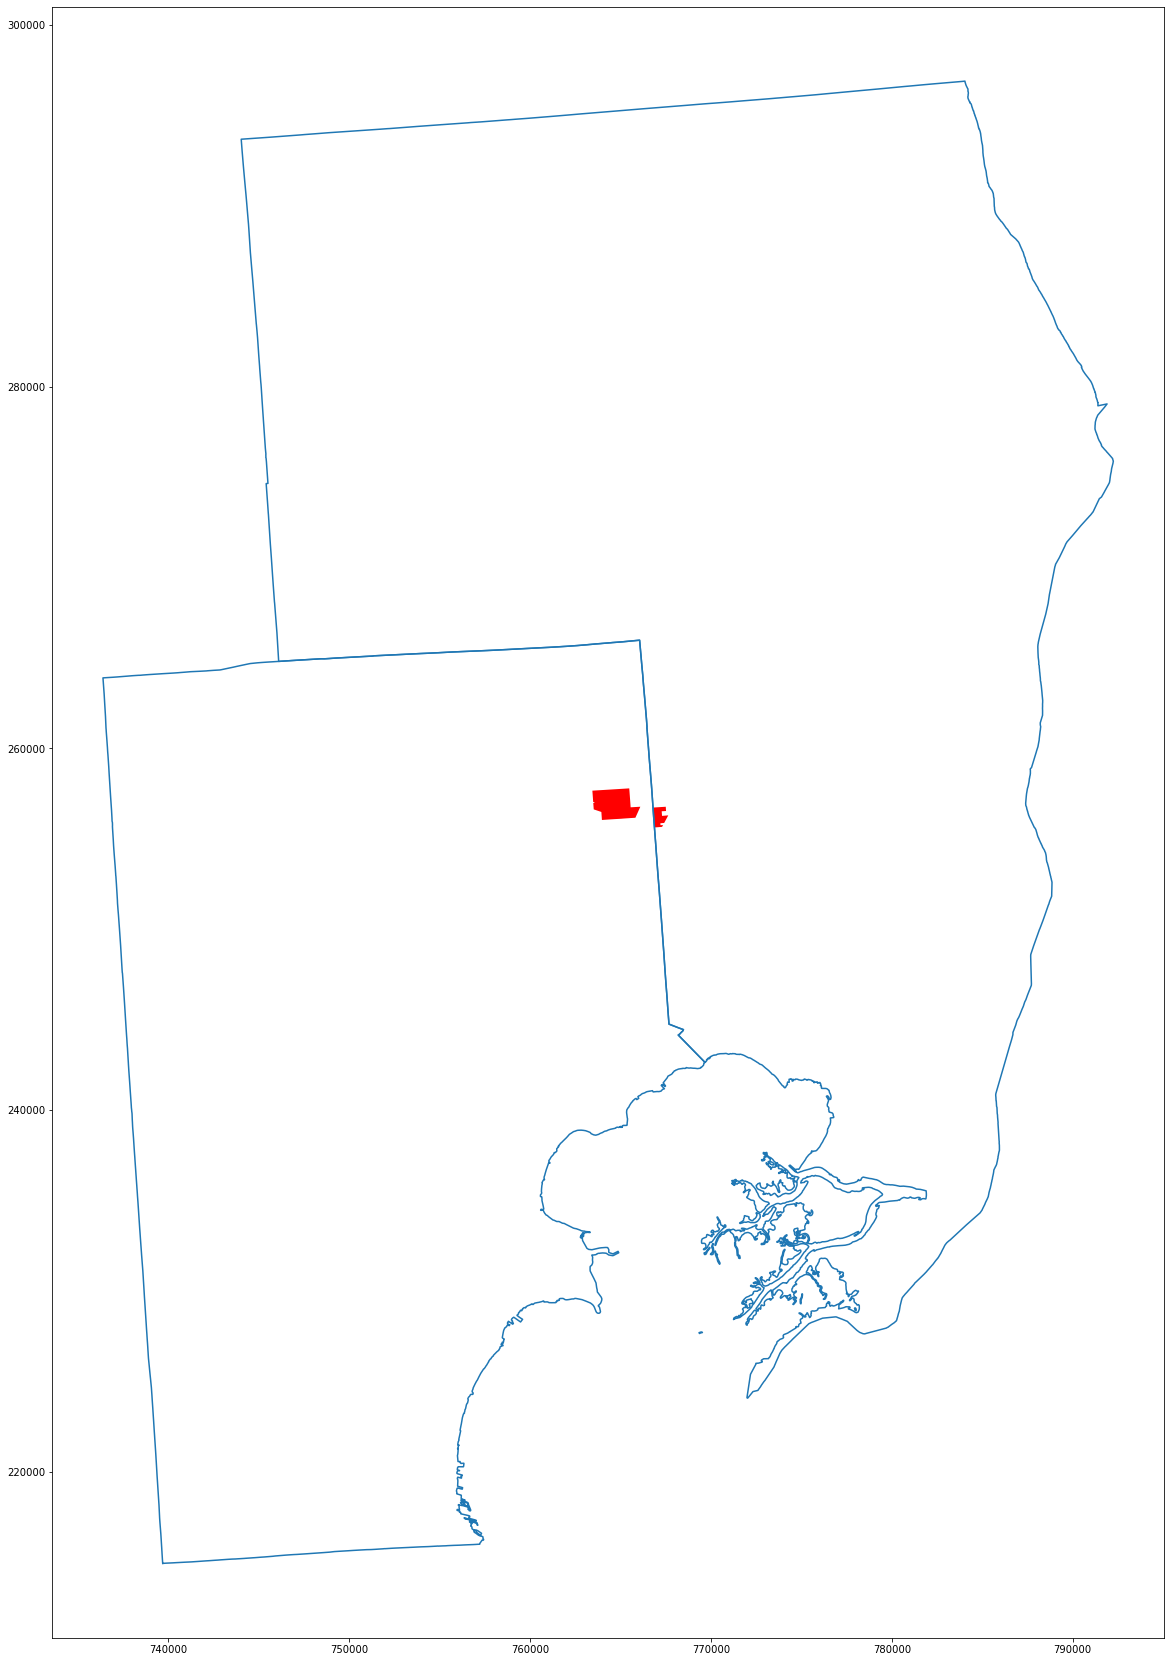

In [101]:
ax = shp_clean[shp_clean["PRECINCTID"]=="WP-099-68380-00001"].plot(color="red",figsize=(30,30))
shp_counties[shp_counties["FIPSCODE"].isin(["099", "147"])].boundary.plot(ax=ax)

In [102]:
shp_clean

,unique_ID,geometry,PRECINCTID,ELECTIONYE,COUNTYFIPS,MCDFIPS,WARD,PRECINCT,OBJECTID_1,OBJECTID,NAME,STATEFP,VTDST,FUNCSTAT,VTDI,LSAD,ShapeSTAre,ShapeSTLen
0,WP-001-01040-00001,"POLYGON ((713885.576 472642.367, 713798.715 47...",WP-001-01040-00001,2020,001,01040,00,001,1,1,0010104000001,26,001001,N,A,V1,1.701076e+08,73869.558749
1,WP-001-12460-00001,"POLYGON ((686272.607 476273.249, 685978.453 47...",WP-001-12460-00001,2020,001,12460,00,001,2,2,0011246000001,26,001002,N,A,V1,1.880860e+08,76737.144518
2,WP-001-19320-00001,"POLYGON ((686986.253 442623.144, 686677.696 44...",WP-001-19320-00001,2020,001,19320,00,001,3,3,0011932000001,26,001003,N,A,V1,1.833231e+08,57470.528359
3,WP-001-34820-00001,"POLYGON ((712947.018 443503.339, 712791.603 44...",WP-001-34820-00001,2020,001,34820,00,001,4,4,0013482000001,26,001004,N,A,V1,6.767958e+07,32987.191075
4,WP-001-35740-00001,"POLYGON ((705992.472 452886.004, 704976.166 45...",WP-001-35740-00001,2020,001,35740,00,001,5,5,0013574000001,26,001005,N,A,V1,9.281010e+07,38642.299469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,WP-035-15920-00001,"MULTIPOLYGON (((600103.738 363378.492, 600058....",WP-035-15920-00001,2020,035,15920,00,001,422,424,0351592000001,26,035002,N,A,V1,9.442402e+06,37257.916393
4751,WP-087-11180-00001,"MULTIPOLYGON (((743650.810 299664.115, 743653....",WP-151-11180-00001,2020,151,11180,00,001,3286,3295,1511118000001,26,151004,N,A,V1,2.921284e+06,11917.930645
4752,WP-151-11180-00001,"MULTIPOLYGON (((743650.810 299664.115, 743650....",WP-151-11180-00001,2020,151,11180,00,001,3286,3295,1511118000001,26,151004,N,A,V1,2.921284e+06,11917.930645
4753,WP-049-27760-00002,"POLYGON ((689045.427 251501.157, 689053.514 25...",WP-049-27760-00002,2020,049,27760,00,002,629,631,0492776000002,26,049039,N,A,V1,2.913230e+06,8687.553911


In [103]:
shp_clean.columns

Index(['unique_ID', 'geometry', 'PRECINCTID', 'ELECTIONYE', 'COUNTYFIPS',
       'MCDFIPS', 'WARD', 'PRECINCT', 'OBJECTID_1', 'OBJECTID', 'NAME',
       'STATEFP', 'VTDST', 'FUNCSTAT', 'VTDI', 'LSAD', 'ShapeSTAre',
       'ShapeSTLen'],
      dtype='object')

In [104]:
#Locate the richmond city shapefile and its index
richmond_city = shp_clean[shp_clean["PRECINCTID"]=="WP-099-68380-00001"]

#Calculate the intersection

macomb = shp_counties[shp_counties["FIPSCODE"].isin(["099"])]
st_clair = shp_counties[shp_counties["FIPSCODE"].isin(["147"])]

richmond_city_macomb = gp.overlay(macomb,richmond_city, how='intersection',keep_geom_type=False)
richmond_city_st_clair = gp.overlay(st_clair,richmond_city, how='intersection',keep_geom_type=False)

<AxesSubplot:>

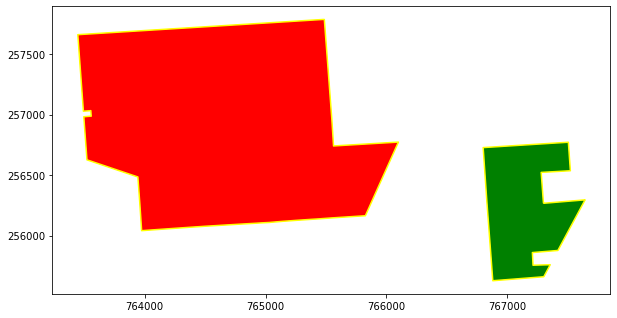

In [105]:
ax = richmond_city.boundary.plot(figsize=(10,10),color="yellow")
richmond_city_macomb.plot(ax=ax,color="red")
richmond_city_st_clair.plot(ax=ax,color="green")

In [106]:
richmond_city.columns

Index(['unique_ID', 'geometry', 'PRECINCTID', 'ELECTIONYE', 'COUNTYFIPS',
       'MCDFIPS', 'WARD', 'PRECINCT', 'OBJECTID_1', 'OBJECTID', 'NAME',
       'STATEFP', 'VTDST', 'FUNCSTAT', 'VTDI', 'LSAD', 'ShapeSTAre',
       'ShapeSTLen'],
      dtype='object')

In [107]:
richmond_city_macomb.columns

Index(['FIPSCODE', 'unique_ID', 'PRECINCTID', 'ELECTIONYE', 'COUNTYFIPS',
       'MCDFIPS', 'WARD', 'PRECINCT', 'OBJECTID_1', 'OBJECTID', 'NAME',
       'STATEFP', 'VTDST', 'FUNCSTAT', 'VTDI', 'LSAD', 'ShapeSTAre',
       'ShapeSTLen', 'geometry'],
      dtype='object')

In [108]:
#Filter down columns
richmond_city_macomb = richmond_city_macomb[richmond_city.columns]
richmond_city_st_clair = richmond_city_st_clair[richmond_city.columns]

#Rename the "county_prec"
richmond_city_macomb['unique_ID']="WP-099-68380-00001"
richmond_city_st_clair['unique_ID']="WP-147-68380-00001"

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [109]:
election_results_final[election_results_final["city_town_name_x"].isin(["RICHMOND CITY"])]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,unique_ID
2051,50,64,00,001,,1199.0,605.0,2.0,8.0,21.0,1.0,15.0,2.0,7.0,625.0,1135.0,099,RICHMOND CITY,099-RICHMOND CITY,61,26,99,68380,0,0,RICHMOND CITY,RICHMOND CITY,WP-099-68380-00001
2052,50,64,00,002,,1092.0,494.0,0.0,5.0,14.0,3.0,12.0,2.0,13.0,524.0,1014.0,099,RICHMOND CITY,099-RICHMOND CITY,61,26,99,68380,0,0,RICHMOND CITY,RICHMOND CITY,WP-099-68380-00002
3442,74,63,00,001,,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,147,RICHMOND CITY,147-RICHMOND CITY,61,26,147,68380,0,0,RICHMOND CITY,RICHMOND CITY,WP-147-68380-00001


In [110]:
#Drop the old precinct
shp_clean = shp_clean[~(shp_clean["unique_ID"]=="WP-099-68380-00001")]


#Add the new files to the dataframe
shp_clean = shp_clean.append(richmond_city_macomb)
shp_clean = shp_clean.append(richmond_city_st_clair)
shp_clean.reset_index(drop=True, inplace=True)

## Join Election Results to Shapefiles

In [111]:
source_join = pd.merge(shp_clean,election_results_final,how="outer",on='unique_ID',indicator=True,validate="1:1")

In [112]:
source_join["_merge"].value_counts()


both          4754
left_only        2
right_only       1
Name: _merge, dtype: int64

In [113]:
source_join[source_join["_merge"]=="left_only"]["unique_ID"]

688     WP-049-29000-05062
3236    WP-139-62460-00009
Name: unique_ID, dtype: object

In [114]:
source_join[source_join["_merge"]=="right_only"]

,unique_ID,geometry,PRECINCTID,ELECTIONYE,COUNTYFIPS_x,MCDFIPS,WARD,PRECINCT,OBJECTID_1,OBJECTID,NAME,STATEFP,VTDST,FUNCSTAT,VTDI,LSAD,ShapeSTAre,ShapeSTLen,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS_y,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,_merge
4756,WP-139-62460-00004,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,20.0,00,004,,785.0,742.0,1.0,2.0,7.0,2.0,21.0,2.0,5.0,656.0,879.0,139,PARK TOWNSHIP,139-PARK TOWNSHIP,61.0,26.0,139,62460,0.0,0.0,PARK TOWNSHIP,PARK TOWNSHIP,right_only


Ottawa: via contact with the Park Township clerk's office, precinct 9 in the state shapefile has been renumbered to precinct 4  

In [115]:
id_changes_dict = {"WP-139-62460-00009":"WP-139-62460-00004"}

shp_clean["unique_ID"] = shp_clean["unique_ID"].map(id_changes_dict).fillna(shp_clean["unique_ID"])

In [116]:
source_join = pd.merge(shp_clean,election_results_final,how="outer",on='unique_ID',indicator=True,validate="1:1")
source_join["_merge"].value_counts()

both          4755
left_only        1
right_only       0
Name: _merge, dtype: int64

In [117]:
source_join[source_join["_merge"]=="left_only"]

,unique_ID,geometry,PRECINCTID,ELECTIONYE,COUNTYFIPS_x,MCDFIPS,WARD,PRECINCT,OBJECTID_1,OBJECTID,NAME,STATEFP,VTDST,FUNCSTAT,VTDI,LSAD,ShapeSTAre,ShapeSTLen,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS_y,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,_merge
688,WP-049-29000-05062,"POLYGON ((687376.165 276241.811, 687131.271 27...",WP-049-29000-05062,2020,049,29000,05,062,675,677,0492900005062,26,049087,N,A,V1,97106.07811,1226.099502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


<AxesSubplot:>

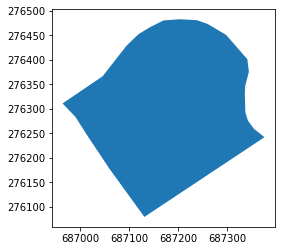

In [118]:
shp_clean[shp_clean["unique_ID"].isin(["WP-049-29000-05062"])].plot()

In [119]:
election_results_final[(election_results_final["COUNTYFIPS"]=="049")&(election_results_final["ward_number"]=="05")]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,unique_ID
768,25,58,05,028,,35.0,562.0,2.0,0.0,7.0,2.0,2.0,1.0,4.0,555.0,39.0,049,FLINT CITY,049-FLINT CITY,61,26,49,29000,0,0,FLINT CITY,FLINT CITY,WP-049-29000-05028
769,25,58,05,029,,41.0,840.0,1.0,2.0,12.0,0.0,2.0,3.0,4.0,826.0,38.0,049,FLINT CITY,049-FLINT CITY,61,26,49,29000,0,0,FLINT CITY,FLINT CITY,WP-049-29000-05029
770,25,58,05,030,,25.0,25.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,24.0,25.0,049,FLINT CITY,049-FLINT CITY,61,26,49,29000,0,0,FLINT CITY,FLINT CITY,WP-049-29000-05030
771,25,58,05,031,,49.0,460.0,0.0,1.0,10.0,0.0,7.0,3.0,5.0,443.0,51.0,049,FLINT CITY,049-FLINT CITY,61,26,49,29000,0,0,FLINT CITY,FLINT CITY,WP-049-29000-05031
772,25,58,05,032,,51.0,182.0,0.0,1.0,3.0,1.0,2.0,1.0,2.0,182.0,46.0,049,FLINT CITY,049-FLINT CITY,61,26,49,29000,0,0,FLINT CITY,FLINT CITY,WP-049-29000-05032
773,25,58,05,033,,26.0,100.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,100.0,26.0,049,FLINT CITY,049-FLINT CITY,61,26,49,29000,0,0,FLINT CITY,FLINT CITY,WP-049-29000-05033
774,25,58,05,034,,29.0,37.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,39.0,26.0,049,FLINT CITY,049-FLINT CITY,61,26,49,29000,0,0,FLINT CITY,FLINT CITY,WP-049-29000-05034
775,25,58,05,035,,26.0,73.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,71.0,22.0,049,FLINT CITY,049-FLINT CITY,61,26,49,29000,0,0,FLINT CITY,FLINT CITY,WP-049-29000-05035
776,25,58,05,036,,9.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,8.0,049,FLINT CITY,049-FLINT CITY,61,26,49,29000,0,0,FLINT CITY,FLINT CITY,WP-049-29000-05036
777,25,58,05,037,,11.0,363.0,0.0,2.0,6.0,0.0,2.0,0.0,2.0,356.0,9.0,049,FLINT CITY,049-FLINT CITY,61,26,49,29000,0,0,FLINT CITY,FLINT CITY,WP-049-29000-05037


## Join Source Files to VEST

In [120]:
final_source = source_join[source_join["_merge"]=="both"]

In [121]:
final_merge = pd.merge(vest_mi_20,source_join,indicator="final_merge",how="outer",on="unique_ID",validate="1:1")

In [122]:
final_merge["final_merge"].value_counts()

both          4756
left_only        0
right_only       0
Name: final_merge, dtype: int64

## Final Shapefile Comparison

In [123]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=vest_mi_20.crs)
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=vest_mi_20.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    4756
dtype: int64


In [124]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .1):
        count += 1
        name = source_geoms.iat[i,0]
        
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [125]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(4756, 1)
0 precincts w/ a difference of 0 km^2
4756 precincts w/ a difference between 0 and .1 km^2
0 precincts w/ a difference between .1 and .5 km^2
0 precincts w/ a difference between .5 and 1 km^2
0 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2
